In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Create device-agnostic code

This means if we have got the access to a cpu our code will use it ( for potentially faster computing)

If no GPU is available, the code will derfualt to using th CPU

In [2]:
#  setup device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
print(f"using device: { device}")

using device: cpu


# We will create data using the linear regression of y= weight* X +bias

In [3]:
#  create weight and bias
weight=0.7
bias=0.3

# create start, end and step
start=0
end=1
step=0.01

# Create X and y (feature and output)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

In [4]:
#  split the data
train_size=int(0.8*len(X))
X_train,y_train=X[:train_size],y[:train_size]
X_test,y_test=X[train_size:],y[train_size:]


# create a function to plot the training, test predictions

In [5]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
    plt.figure(figsize=(12,7))
    plt.scatter(train_data,train_label,c='r',s=7,label='Training Data')
    plt.scatter(test_data,test_label,c='b',s=7,label='Test Data')

    if predictions is not None:
        plt.scatter(test_data,predictions,c='g',s=9,label='Predictions')
    plt.legend()
    plt.show()


#

In [6]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        # self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.linear_layer=nn.Linear(in_features=1,out_features=1)

    def forward(self,x:torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)
        # return self.weight*x+self.bias



# Create a Manual seed to maintain the reproducibility

 Make an instance of the class LinearRegressionModel

 Print the the random initialized weights of the model using the

 `model_1.state_dict()`

In [7]:
# use seed to maintain the reproducebility in the code
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# Check the on which device the model is on currently
Set the model to user the CPU or GPU using `.to(device)`

In [8]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [9]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

# Training


1.   Epoch
2.   Loss function
3.   Optimizer
4.   Train and test loop


In [10]:
epochs=5000
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.001)


# Raw Prediction without training to know where we started from

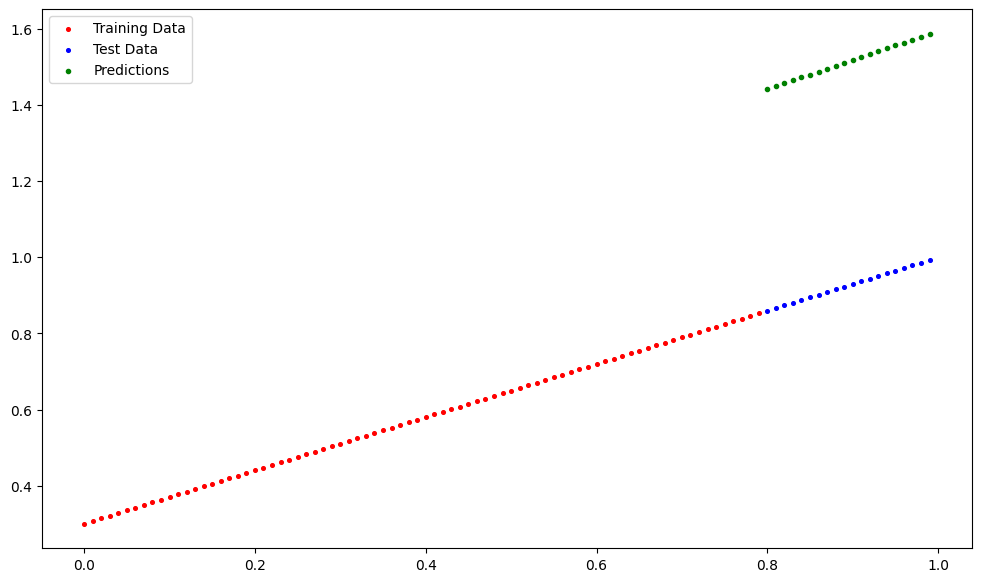

In [11]:
with torch.inference_mode():
    y_pred=model_1(X_test.to(device))
plot_predictions(predictions=y_pred.cpu())

# The Training and the Testing loop

In [12]:
# make lists to store the loss epoch and the test loss
epoch_values=[]
train_loss_values=[]
test_loss_values=[]

# Put the data on target device
X_train=X_train.to(device)
y_train=y_train.to(device)

X_test=X_test.to(device)
y_test=y_test.to(device)


for epoch in range(epochs):
    # 1. Make the model in training mode
    model_1.train()
    # 2. Make predictions on training data
    y_pred=model_1(X_train)
    # 3. Calculate the loss using the loss function
    train_loss=loss_fn(y_pred,y_train)
    # 4.Use the zero grad to remove the accumulated gradient
    optimizer.zero_grad()
    # 5. Calculate the  gradient using the backward function
    train_loss.backward()
    # 6. step the optimizer to do the step m=m-lr*slope
    optimizer.step()


    # Testing model after each training
    model_1.eval()
    with torch.inference_mode():
    # change the mode to inference mode and then predict on the test set and see the loss value
        test_pred=model_1(X_test)

        test_loss=loss_fn(test_pred,y_test)

    if epoch%10==0:
        print(f'Epoch : {epoch} | Train MAE Loss : {train_loss} | Test MAE Loss : {test_loss}')
        # print(model_1.state_dict())
    epoch_values.append(epoch)
    train_loss_values.append(train_loss.item())
    test_loss_values.append(test_loss.item())


print(f"Trianing Finished successfully Final values are Train MAE Loss : {train_loss} | Test MAE Loss : {test_loss} ")


Epoch : 0 | Train MAE Loss : 0.5555006265640259 | Test MAE Loss : 0.5864163637161255
Epoch : 10 | Train MAE Loss : 0.5439404249191284 | Test MAE Loss : 0.572881281375885
Epoch : 20 | Train MAE Loss : 0.5323804020881653 | Test MAE Loss : 0.5593461394309998
Epoch : 30 | Train MAE Loss : 0.5208202600479126 | Test MAE Loss : 0.5458110570907593
Epoch : 40 | Train MAE Loss : 0.5092601180076599 | Test MAE Loss : 0.5322758555412292
Epoch : 50 | Train MAE Loss : 0.497700035572052 | Test MAE Loss : 0.5187407732009888
Epoch : 60 | Train MAE Loss : 0.48613986372947693 | Test MAE Loss : 0.5052056312561035
Epoch : 70 | Train MAE Loss : 0.47457975149154663 | Test MAE Loss : 0.49167054891586304
Epoch : 80 | Train MAE Loss : 0.46301960945129395 | Test MAE Loss : 0.4781354069709778
Epoch : 90 | Train MAE Loss : 0.4514595568180084 | Test MAE Loss : 0.46460026502609253
Epoch : 100 | Train MAE Loss : 0.43989938497543335 | Test MAE Loss : 0.45106521248817444
Epoch : 110 | Train MAE Loss : 0.4283393025398254

# Plot Predictions After Training

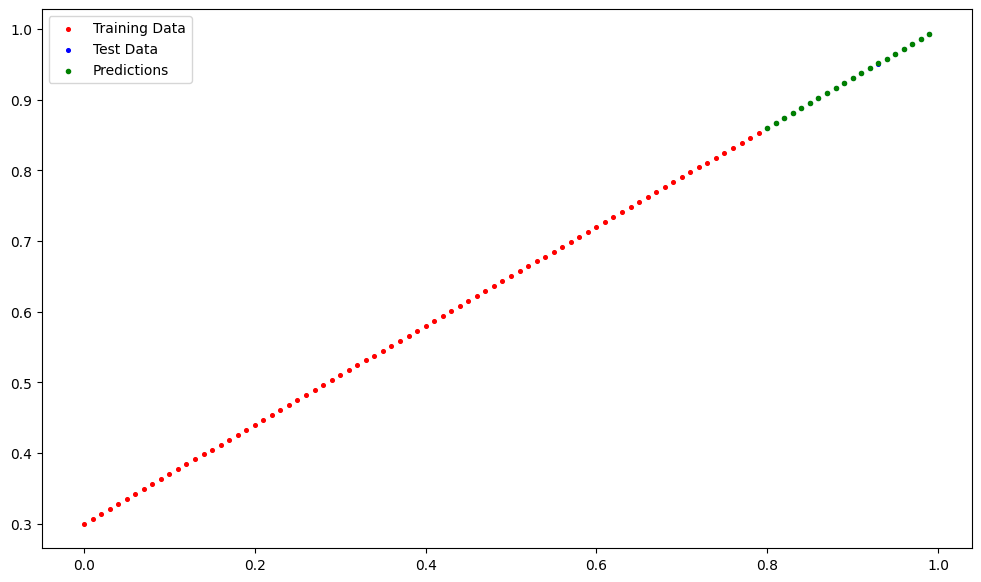

OrderedDict([('linear_layer.weight', tensor([[0.6997]])),
             ('linear_layer.bias', tensor([0.3004]))])

In [13]:
plot_predictions(predictions=test_pred.cpu())
model_1.state_dict()

# Plot the Train and Test Loss

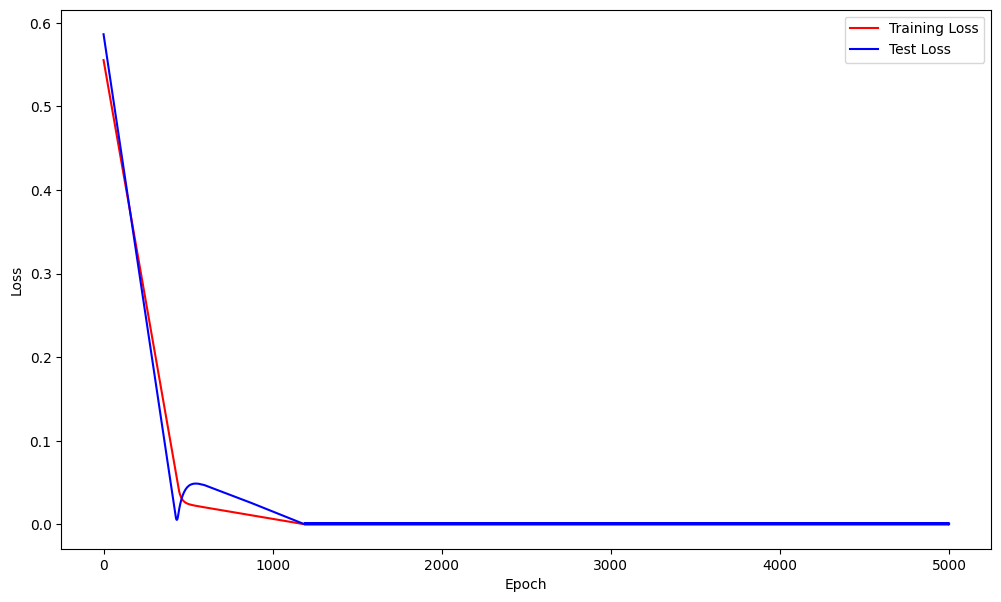

In [14]:
def plot_loss( train_loss_values=train_loss_values,test_loss=test_loss_values,epochs_values=epoch_values):
    plt.figure(figsize=(12,7))
    plt.plot(epoch_values,train_loss_values,c='r',label='Training Loss')
    plt.plot(epoch_values,test_loss_values,c='b',label='Test Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
plot_loss()


# Create the model folder and the model path to save the parameters in it

In [15]:
from pathlib import Path
MODEL_PATH=Path('Models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME= '02_pytorch_linear_regression_version_1.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

torch.save(f=MODEL_SAVE_PATH,obj=model_1.state_dict())
print(f"Model Saved Successfully at {MODEL_SAVE_PATH}")

Model Saved Successfully at Models/02_pytorch_linear_regression_version_1.pth


# Load the Model and make some Predictions

 Create the instance of the original model and the load the state dict using `load_state_dict()`

In [16]:
loaded_model_1=LinearRegressionModelV2()
# just after the inistialization the weights and bias has the random value
# loaded_model_1.state_dict()
# now try to load the saved model
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

<ipython-input-16-d8bf7dc95536>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [17]:
# now after running the above code the weights and bias has been loaded from the file
loaded_model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6997]])),
             ('linear_layer.bias', tensor([0.3004]))])

In [18]:
with torch.inference_mode():
    load_test_pred=loaded_model_1(X_test)
#  check it the model is loaded correctly and making the predictions
print(test_pred==load_test_pred)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])
